---------------

<font size='5' face='Courier New'><h1 align="center"><i>Optimizer Performance Comparison in Python v2.7 with the p-Median Problem</i></h1></font> 

------

---

<font size='4' face='Arial'><h1 align="center"><i>Gurobi Optimizer v6.0.2</i></h1></font>
<font size='4' face='Arial'><h1 align="center"><i>vs.</i></h1></font>
<font size='4' face='Arial'><h1 align="center"><i>IBM ILOG CPLEX Optimizer v12.6.0</i></h1></font>

----

---

<font size='4' face='Arial'><h1 align="center"><i>PySAL v1.10.0</i></h1></font>

-------

<font face='Times New Roman' size='6'><h3 align="center"><u>*James&nbsp;D.&nbsp;Gaboardi*</u></h3></font>

------
<font face='Times New Roman' size='5'><h3 align="center">*Florida State University* &nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp; *Department of Geography*</h3></font>

------

<font size='3' face='Times New Roman'><p><b>GNU LESSER GENERAL PUBLIC LICENSE</b></p>
<p><i>Version 3, 29 June 2007</i></p>
<p> Copyright (C) 2007 Free Software Foundation, Inc. <http://fsf.org/></p>
<p> Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed.</p></font>
 
 ----

<font size='7' face='Times New Roman'><b><u>The <i>p</i>-Median Problem</u></b></font>


-------------------------------

<p><font size='5' face='Courier New'><u>Minimize</u></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\sum_{i∊1}^n\sum_{j∊1}^m$<i>&thinsp; a<sub>i</sub>c<sub>ij</sub>x<sub>ij</sub></i></font></p>

<p><font size='5' face='Courier New'><u>Subject to</u></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∑_{j∊m}$<i>x<sub>ij</sub></i> = 1,&nbsp;&nbsp;&nbsp;&nbsp;∀<i> i</i> ∊<i> n</i></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∑_{i∊n}$<i>y<sub>j</sub> = p</i></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>x<sub>ij</sub> - y<sub>j</sub></i> ≥ 0,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ∀<i> i</i> ∊<i> n</i>, <i> j</i> ∊<i> m</i></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>x<sub>ij</sub>, y<sub>j</sub></i> ∊(0,1)&nbsp;&nbsp;&nbsp;&nbsp; ∀<i> i</i> ∊<i> n</i>, <i> j</i> ∊<i> m</i></font></p>

<p><font size='5' face='Courier New'><u>where</u></font></p>

<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> i</i> = a specific origin</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> j</i> = a specific destination</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> n</i> = the set of origins</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> m</i> = the set of destinations</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> a<sub>i</sub></i> = weight at each node</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> c<sub>ij</sub></i> = travel costs between nodes</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> x<sub>ij</sub></i> = the decision variable at each node in the matrix</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> y<sub>j</sub></i> = nodes chosen as service facilities</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> p</i> = the number of facilities to be sited</font></p>

------

<p><font size='4' face='Times New Roman'>Adapted from:</font></p>
<p><font size='4' face='Times New Roman'><b>Horner, M. W. and M. J. Widener</b>. 2010. <i>How do socioeconomic characteristics interact with equity and efficiency considerations? An analysis of hurricane disaster relief goods provision</i>. Geospatial Analysis and Modelling of Urban Structure and Dynamics 99:393–414.</font></p>

-----------

<font size='7' face='Times New Roman'><b>0. <u>Imports</u></b></font>

In [1]:
import pysal as ps
import numpy as np
import networkx as nx
import shapefile as shp
import gurobipy as gbp
import cplex as cp
import datetime as dt
import time
from collections import OrderedDict
import IPython.display as IPd
%pylab inline
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


<font size='7' face='Times New Roman'><b>1. <u>Data preparation and creation</u></b></font>

<font size='5' face='Times New Roman'><b>1.1 <u>Instantiate a network</u></b></font>

In [2]:
ntw = ps.Network('Waverly/Waverly.shp')
print dt.datetime.now()
print 'PySAL.Network\n'
print dir(ntw)

2015-08-17 15:46:57.431621
PySAL.Network

['NetworkF', 'NetworkG', 'NetworkK', '__doc__', '__init__', '__module__', '_extractnetwork', '_newpoint_coords', '_round_sig', '_snap_to_edge', '_yieldneighbor', 'adjacencylist', 'allneighbordistances', 'compute_distance_to_nodes', 'contiguityweights', 'count_per_edge', 'distancebandweights', 'edge_lengths', 'edge_to_graph', 'edges', 'enum_links_node', 'extractgraph', 'graph_lengths', 'graph_to_edges', 'graphedges', 'in_shp', 'loadnetwork', 'nearestneighbordistances', 'node_coords', 'node_distance_matrix', 'node_list', 'node_sig', 'nodes', 'pointpatterns', 'savenetwork', 'segment_edges', 'simulate_observations', 'snapobservations', 'unique_segs']


<font size='5' face='Times New Roman'><b>1.2 <u>Instantiate all graphs to be drawn</u></b></font>

In [3]:
# Roads and Nodes
g = nx.Graph()
# Graph of Roads and Nodes
g1 = nx.MultiGraph()
# Clients
GRAPH_client = nx.Graph()
# Snapped Clients
g_client = nx.Graph()
# Service
GRAPH_service = nx.Graph()
# Snapped Service
g_service = nx.Graph()
# Gurobi p-Median
GUROBI_median_g = nx.Graph()
# Cplex p-Median
CPLEX_median_g = nx.Graph()

<font size='5' face='Times New Roman'><b>1.3 <u>Create Bounding Box from 'Waverly.shp'</u></b></font>

In [4]:
shp_W = ps.open('Waverly/Waverly.shp')
shp_W.bbox

[-84.280694, 30.450132999999997, -84.24955399999999, 30.507330999999997]

<font size='5' face='Times New Roman'><b>1.4 <u>Create numpy arrays of random floats within a  bounding box</u></b></font>

In [5]:
lat_client = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 600)
lon_client = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 600)
lat_service = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 300)
lon_service = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 300)

<font size='5' face='Times New Roman'><b>1.5 <u>Zip the latitude and longitude lists together</u></b></font>

In [6]:
rand_coords_client = map(list, zip(lat_client, lon_client))
rand_coords_service = map(list, zip(lat_service, lon_service))

<font size='5' face='Times New Roman'><b>1.6 <u>Create Empty Random Points Dictionaries</u></b></font>

In [7]:
points_client = {}
points_service = {}

<font size='5' face='Times New Roman'><b>1.7 <u>Fill dictionaries of random roints</u></b></font>

In [8]:
# CLIENT
for idx, coords in enumerate(rand_coords_client):
    GRAPH_client.add_node(idx)
    points_client[idx] = coords
    GRAPH_client.node[idx] = coords
# SERVICE   
for idx, coords in enumerate(rand_coords_service):
    GRAPH_service.add_node(idx)
    points_service[idx] = coords
    GRAPH_service.node[idx] = coords

<font size='5' face='Times New Roman'><b>1.8 <u>Draw network, simplified network, and random client & service nodes</u></b></font>

2015-08-17 15:47:00.070312


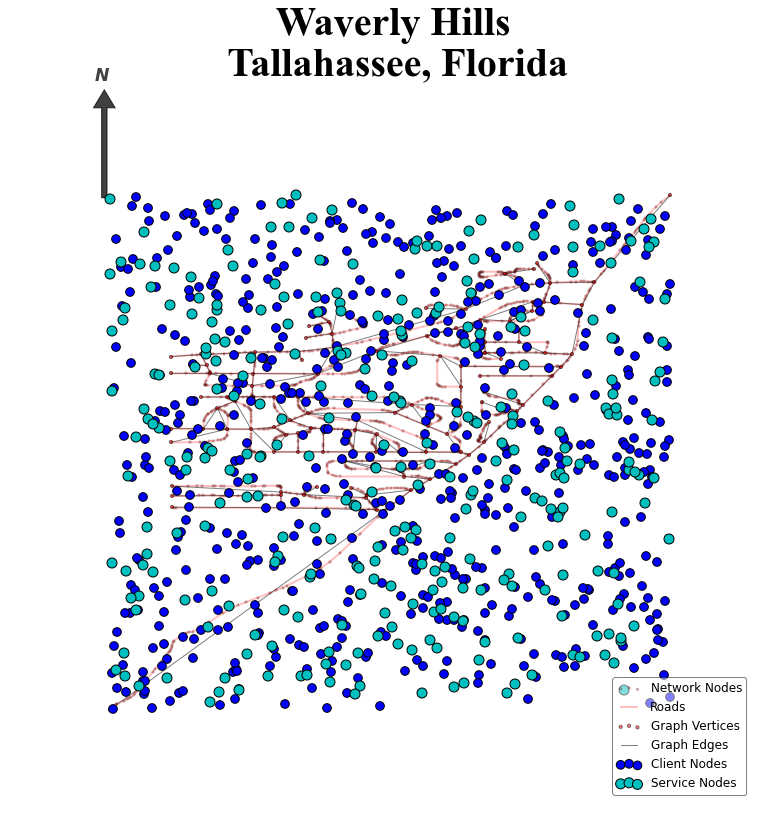

In [9]:
print dt.datetime.now()
#Instantiate Figure
figsize(10,10)
# Draw Graph of Actual Nodes and Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw only unique edges in graph
for e in ntw.graphedges:
    g1.add_edge(*e)
    # highlights cases where start and end node are the same
    if e[0]==e[1]:
        g1.add_node(e[0])
for node_id in g1.node:
    g1.node[node_id] = ntw.node_coords[node_id]
nx.draw(g1, ntw.node_coords, node_size=10, alpha=0.5)
# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=75, alpha=1, node_color='b')
# Draw Graph of Random Service Points
nx.draw(GRAPH_service, points_service, 
    node_size=100, alpha=1, node_color='c')
# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Graph Vertices']=g1
LEGEND['Graph Edges']=g1
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

<font size='5' face='Times New Roman'><b>1.9 <u>Create weights at nodes and sum</u></b></font>

In [10]:
# Client Weights
Ai = np.random.randint(5, 50, len(rand_coords_client))
Ai = Ai.reshape(len(Ai),1)
# Sum
AiSum = np.sum(Ai)

<font size='5' face='Times New Roman'><b>1.10 <u>Instantiate client and service shapefiles</u></b></font>

In [11]:
# Client
client = shp.Writer(shp.POINT)
# Add Random Points
for i,j in rand_coords_client:
    client.point(i,j)
# Add Fields
client.field('client_ID')
client.field('Weight')
client.field('LAT')
client.field('LON')
counter = 0
for i in range(len(rand_coords_client)):
    counter = counter + 1
    client.record('client_' + str(counter), Ai[i], lat_client[i], lon_client[i])
# Save Shapefile    
client.save('shapefiles/RandomPoints_CLIENT')

#Service
service = shp.Writer(shp.POINT)
# Add Random Points
for i,j in rand_coords_service:
    service.point(i,j)
# Add Fields
service.field('y_ID')
service.field('x_ID')
service.field('LAT')
service.field('LON')
counter = 0
for i in range(len(rand_coords_service)):
    counter = counter + 1
    service.record('y' + str(counter), 'x' + str(counter), lat_service[i], lon_service[i])
# Save Shapefile    
service.save('shapefiles/RandomPoints_SERVICE')

<font size='5' face='Times New Roman'><b>1.11 <u>Snap Observations to NTW</u></b></font>

In [12]:
t1 = time.time()
ntw.snapobservations('shapefiles/RandomPoints_CLIENT.shp', 
                     'Rand_Points_CLIENT', attribute=True)
ntw.snapobservations('shapefiles/RandomPoints_SERVICE.shp', 
                     'Rand_Points_SERVICE', attribute=True)
print round(time.time()-t1, 4), 'seconds'

13.986 seconds


<font size='5' face='Times New Roman'><b>1.12 <u>Draw NTW, snapped coords, & random coords</u></b></font>

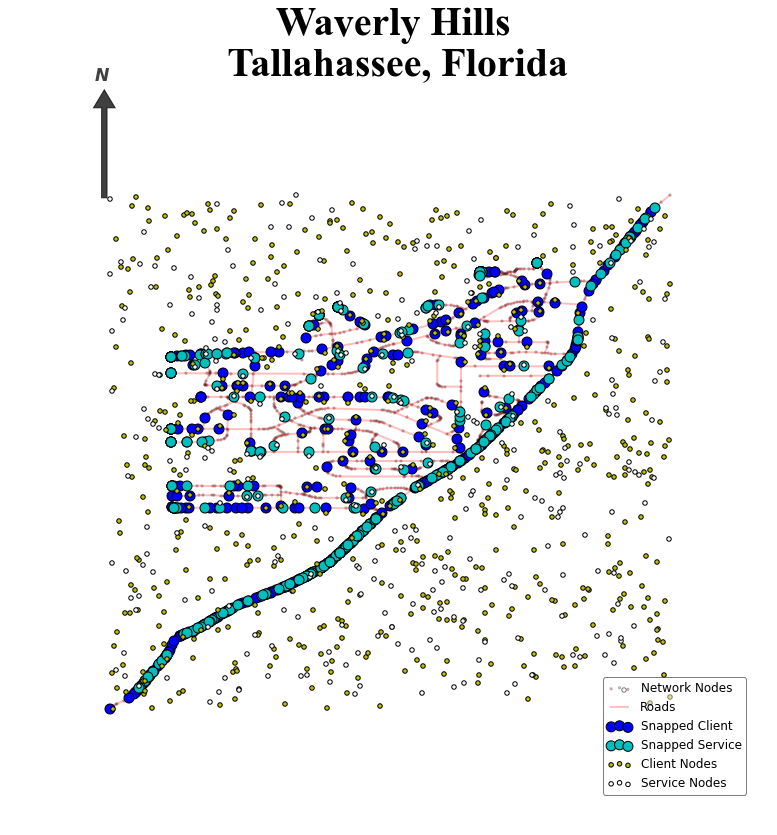

In [13]:
# Instantiate Figure
figsize(10,10)
# Draw Graph of Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw Graph of Snapped Client Nodes
g_client = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates.iteritems():
    g_client.add_node(p)
    g_client.node[p] = coords
nx.draw(g_client, ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates, 
        node_size=100, alpha=1, node_color='b')
# Draw Graph of Snapped Service Nodes
g_service = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    g_service.add_node(p)
    g_service.node[p] = coords
nx.draw(g_service, ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates, 
        node_size=100, alpha=1, node_color='c')
# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=20, alpha=1, node_color='y')
# Draw Graph of Random Client Points
nx.draw(GRAPH_service, points_service, 
    node_size=20, alpha=1, node_color='w')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Snapped Client']=g_client
LEGEND['Snapped Service']=g_service
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5)
# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

<font size='5' face='Times New Roman'><b>1.13 <u>Create distance matrix</u></b></font>

In [14]:
t1 = time.time()
All_Neigh_Dist = ntw.allneighbordistances(sourcepattern=ntw.pointpatterns['Rand_Points_CLIENT'],
                                             destpattern=ntw.pointpatterns['Rand_Points_SERVICE'])
All_Dist_MILES = All_Neigh_Dist * float(10000/90) * 0.6214
seconds = round(time.time()-t1, 4)
print seconds, 'seconds'
print 'Client [i] x Service [j] Matrix Shape --> ', All_Dist_MILES.shape

7.2847 seconds
Client [i] x Service [j] Matrix Shape -->  (600, 300)


----------------------

<font size='7' face='Times New Roman'><b>2. <u>Mathematical Optimization</u></b></font>

<font size='5' face='Times New Roman'><b>2.1a  <u>Gurobi <i>p</i>-Median test [<i>p</i> = 2]</u></b></font>

In [15]:
t1 = time.time()

#     1. Data
# Demand
Ai = Ai
# Demand Sum
AiSum = AiSum
# Travel Costs
Cij = All_Dist_MILES
# Weighted Costs
Sij = Ai * Cij
client_nodes = range(len(Sij))
service_nodes = range(len(Sij[0]))

mPMP_GUROBI = gbp.Model(' -- p-Median -- ')

gbp.setParam('MIPFocus', 2)

# Client IxJ
client_var = []
for orig in client_nodes:
    client_var.append([])
    for dest in service_nodes:
        client_var[orig].append(mPMP_GUROBI.addVar(vtype=gbp.GRB.BINARY, 
                                            obj=Sij[orig][dest], 
                                            name='x'+str(orig+1)+'_'+str(dest+1)))
#J
serv_var = []
for dest in service_nodes:
    serv_var.append([])
    serv_var[dest].append(mPMP_GUROBI.addVar(vtype=gbp.GRB.BINARY, 
                                    name='y'+str(dest+1)))
mPMP_GUROBI.update()
mPMP_GUROBI.setObjective(gbp.quicksum(Sij[orig][dest]*client_var[orig][dest] 
                        for orig in client_nodes for dest in service_nodes), 
                        gbp.GRB.MINIMIZE)
for orig in client_nodes:
    mPMP_GUROBI.addConstr(gbp.quicksum(client_var[orig][dest] 
                        for dest in service_nodes) == 1)
for orig in service_nodes:
    for dest in client_nodes:
        mPMP_GUROBI.addConstr((serv_var[orig] - client_var[dest][orig] >= 0))
mPMP_GUROBI.addConstr(gbp.quicksum(serv_var[dest][0] for dest in service_nodes) == 2)
mPMP_GUROBI.optimize()
t2P = time.time()-t1
mPMP_GUROBI.write('LP_Files/WaverlyPMP_GUROBI.lp')
print '\n*************************************************************************'
selected = []
dbf1 = ps.open('shapefiles/RandomPoints_SERVICE.dbf')
NEW_Records_PMP_GUROBI = []
for v in mPMP_GUROBI.getVars():
    if 'x' in v.VarName:
        pass
    elif v.x > 0:
        var = '%s' % v.VarName
        selected.append(var)
        for i in range(dbf1.n_records):
            if var in dbf1.read_record(i):
                x = dbf1.read_record(i)
                NEW_Records_PMP_GUROBI.append(x)
            else:
                pass
        print '    |                                            ', var
print '    | Selected Facility Locations --------------  ^^^^ '
print '    | Candidate Facilities [p] ----------------- ', len(selected)
val = mPMP_GUROBI.objVal
print '    | Objective Value (miles) ------------------ ', val
avg = float(mPMP_GUROBI.objVal)/float(AiSum)
print '    | Avg. Value / Client (miles) -------------- ', avg
print '    | Real Time to Optimize (sec.) ------------- ', t2P
print '    | Date/Time -------------------------------- ', dt.datetime.now()
print '*************************************************************************'
print '-- Gurobi p-Median Problem --'
print '\nJames Gaboardi, 2015'

Changed value of parameter MIPFocus to 2
   Prev: 0   Min: 0   Max: 3   Default: 0
Optimize a model with 180601 rows, 180300 columns and 540300 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e-04, 2e+02]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 2e+00]
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve time: 9.31s
Presolved: 180601 rows, 180300 columns, 540300 nonzeros
Variable types: 0 continuous, 180300 integer (180300 binary)
Found heuristic solution: objective 18471.092533
Presolved: 180601 rows, 180300 columns, 540300 nonzeros


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.7401737e+02   5.920000e+02   0.000000e+00     14s
   10547    4.3252114e+03   8.288000e+03   0.000000e+00     15s
   31018    8.8309983e+03   1.104000e+03   0.000000e+00     20s
   49891    1.1305642e+04   3.310000e+02   0.000000e+00     25s
   58727    1.2145396e+04   0.000000e+00  

<font size='5' face='Times New Roman'><b>2.1b <u>Instantiate Selected Gurobi <i>p</i>-median shapefile</u></b></font>

In [16]:
SHP_Median_GUROBI = shp.Writer(shp.POINT)
# Add Points
for idy,idx,x,y in NEW_Records_PMP_GUROBI:
    SHP_Median_GUROBI.point(float(x), float(y))
# Add Fields
SHP_Median_GUROBI.field('y_ID')
SHP_Median_GUROBI.field('x_ID')
SHP_Median_GUROBI.field('LAT')
SHP_Median_GUROBI.field('LON')
# Add Records
for idy,idx,x,y in NEW_Records_PMP_GUROBI:
    SHP_Median_GUROBI.record(idy,idx,x,y)
# Save Shapefile    
SHP_Median_GUROBI.save('shapefiles/Selected_Locations_Pmedian_GUROBI')

------------------

<font size='5' face='Times New Roman'><b>2.2a  <u>Cplex <i>p</i>-Median test [<i>p</i> = 2]</u></b></font>

In [17]:
t1 = time.time()

# Demand
Ai = Ai
# Demand Sum
AiSum = AiSum
# Travel Costs
Cij = All_Dist_MILES
# Weighted Costs
Sij = Ai * Cij
client_nodes = range(len(Sij))
service_nodes = range(len(Sij[0]))

all_nodes = len(Sij) * len(Sij[0])
ALL_nodes = range(all_nodes)

x = 'x'
cli_var = []
for i in client_nodes:
    for j in service_nodes:
        temp = x + str(i+1) + '_' + str(j+1)
        cli_var.append(temp)
client_var = np.array(cli_var)
client_var = client_var.reshape(len(Sij),len(Sij[0]))

y = 'y'
fac_var = []
for i in service_nodes:
    temp = y + str(i+1)
    fac_var.append(temp)
facility_var = np.array(fac_var)
facility_var = facility_var.reshape(1,len(Sij[0]))

#     2. Create Model and Add Variables
# Create Model
mPMP_CPLEX = cp.Cplex()
# Problem Name
mPMP_CPLEX.set_problem_name('\n -- P-Median -- ')
print mPMP_CPLEX.get_problem_name()

# Problem Type  ==>  Linear Programming
mPMP_CPLEX.set_problem_type(mPMP_CPLEX.problem_type.LP)
# Set MIP Emphasis to '2' --> Optimal
mPMP_CPLEX.parameters.emphasis.mip.set(2)
print mPMP_CPLEX.parameters.get_changed()
print '\nProblem Type\n    ' + str(mPMP_CPLEX.problem_type[mPMP_CPLEX.get_problem_type()])
# Objective Function Sense  ==>  Minimize
mPMP_CPLEX.objective.set_sense(mPMP_CPLEX.objective.sense.minimize)
print 'Objective Sense\n    ' + str(mPMP_CPLEX.objective.sense[mPMP_CPLEX.objective.get_sense()])
# Add Client Decision Variables
mPMP_CPLEX.variables.add(names = [cli_var[i] for i in ALL_nodes],
                        obj = [Sij[i][j] for i in client_nodes for j in service_nodes], 
                        lb = [0] * all_nodes, 
                        ub = [1] * all_nodes, 
                        types = ['B'] * all_nodes)
# Add Service Decision Variable
mPMP_CPLEX.variables.add(names = [fac_var[j] for j in service_nodes],
                        lb = [0] * len(Sij[0]), 
                        ub = [1] * len(Sij[0]), 
                        types = ['B'] * len(Sij[0]))

#    3. Add Constraints
# Add Assignment Constraints
for orig in client_nodes:       
    assignment_constraints = cp.SparsePair(ind = [client_var[orig][dest] 
                                            for dest in service_nodes],                           
                                            val = [1] * len(Sij[0]))
    mPMP_CPLEX.linear_constraints.add(lin_expr = [assignment_constraints],                 
                                senses = ['E'], 
                                rhs = [1]);
# Add Facility Constraint
facility_constraint = cp.SparsePair(ind = fac_var, 
                                    val = [1.0] * len(Sij[0]))
mPMP_CPLEX.linear_constraints.add(lin_expr = [facility_constraint],
                                senses = ['E'],
                                rhs = [2])
# Add Opening Constraint
cli_var_open = []
for i in client_nodes:
    for j in service_nodes:
        temp = x + str(i+1) + '_' + str(j+1)
        cli_var_open.append(temp)
fac_var_open = []
for i in client_nodes:
    for j in service_nodes:
        temp = y + str(j+1)
        fac_var_open.append(temp)
l = []
for i in ALL_nodes:
    l.append([cli_var_open[i]]+[fac_var_open[i]])
for i in l:
    opening_constraint = cp.SparsePair(ind = i, val = [-1.0, 1.0])
    mPMP_CPLEX.linear_constraints.add(lin_expr = [opening_constraint], 
                                senses = ['G'], 
                                rhs = [0])

#    4. Optimize and Print Results
mPMP_CPLEX.solve()
t2C = time.time()-t1
mPMP_CPLEX.write('LP_Files/WaverlyPMP_CPLEX.lp')
solution = mPMP_CPLEX.solution
selected = []
dbf1 = ps.open('shapefiles/RandomPoints_SERVICE.dbf')
NEW_Records_PMP_CPLEX = []
for v in mPMP_CPLEX.variables.get_names():
    if 'x' in v:
        pass
    elif (solution.get_values(v) >
        mPMP_CPLEX.parameters.mip.tolerances.integrality.get()):
        var = '%s' % v
        selected.append(var)
        for i in range(dbf1.n_records):
            if var in dbf1.read_record(i):
                x = dbf1.read_record(i)
                NEW_Records_PMP_CPLEX.append(x)
            else:
                pass
# solution.get_status() returns an integer code
print 'Solution status = ' , solution.get_status(), ':',
# the following line prints the corresponding string
print solution.status[solution.get_status()]
# Display solution.
print 'Total cost:  ' , solution.get_objective_value()
print 'Determination Time to Build Model in Python and Optimize (sec.):  ', mPMP_CPLEX.get_dettime(), 'ticks'
print 'Real Time to Build Model in Python and Optimize (sec.):  ', t2C
print '****************************'
for f in fac_var:
    if (solution.get_values(f) >
        mPMP_CPLEX.parameters.mip.tolerances.integrality.get()):
        print '    Facility %s is open' % f
    else:
        pass #print '    Facility %s is closed' % f           
print '****************************'
print '\n----- Date/Time ------------------- ', dt.datetime.now()
print '\n----- Cplex p-Median Problem -----'
print '\n-----\nJames Gaboardi, 2015'


 -- P-Median -- 
[(parameters.emphasis.mip, 2)]

Problem Type
    LP
Objective Sense
    minimize
Found incumbent of value 32496.360001 after 0.04 sec. (21.04 ticks)
Tried aggregator 1 time.
Reduced MIP has 180601 rows, 180300 columns, and 540300 nonzeros.
Reduced MIP has 180300 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 7.02 sec. (2308.98 ticks)
Probing time = 0.31 sec. (53.26 ticks)
Tried aggregator 1 time.
Reduced MIP has 180601 rows, 180300 columns, and 540300 nonzeros.
Reduced MIP has 180300 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 6.71 sec. (2309.66 ticks)
Probing time = 0.30 sec. (52.97 ticks)
Clique table members: 180600.
MIP emphasis: optimality.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 26.85 sec. (3079.87 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*  

Default row names c1, c2 ... being created.


Solution status =  101 : MIP_optimal
Total cost:   12145.3961216
Determination Time to Build Model in Python and Optimize (sec.):   691087.915914 ticks
Real Time to Build Model in Python and Optimize (sec.):   812.942018986
****************************
    Facility y161 is open
    Facility y298 is open
****************************

-----Date/Time -------------------  2015-08-17 16:01:38.655510

----- Cplex p-Median Problem -----

-----
James Gaboardi, 2015


<font size='5' face='Times New Roman'><b>2.2b <u>Instantiate Selected Cplex <i>p</i>-median shapefile</u></b></font>

In [18]:
SHP_Median_CPLEX = shp.Writer(shp.POINT)
# Add Points
for idy,idx,x,y in NEW_Records_PMP_CPLEX:
    SHP_Median_CPLEX.point(float(x), float(y))
# Add Fields
SHP_Median_CPLEX.field('y_ID')
SHP_Median_CPLEX.field('x_ID')
SHP_Median_CPLEX.field('LAT')
SHP_Median_CPLEX.field('LON')
# Add Records
for idy,idx,x,y in NEW_Records_PMP_CPLEX:
    SHP_Median_CPLEX.record(idy,idx,x,y)
# Save Shapefile    
SHP_Median_CPLEX.save('shapefiles/Selected_Locations_Pmedian_CPLEX')

------------------

<font size='7' face='Times New Roman'><b>3. <u>Selected locations</u></b></font>

<font size='5' face='Times New Roman'><b>3.1 <u>Gurobi & Cplex <i>p</i>-Median Selected locations</u></b></font>

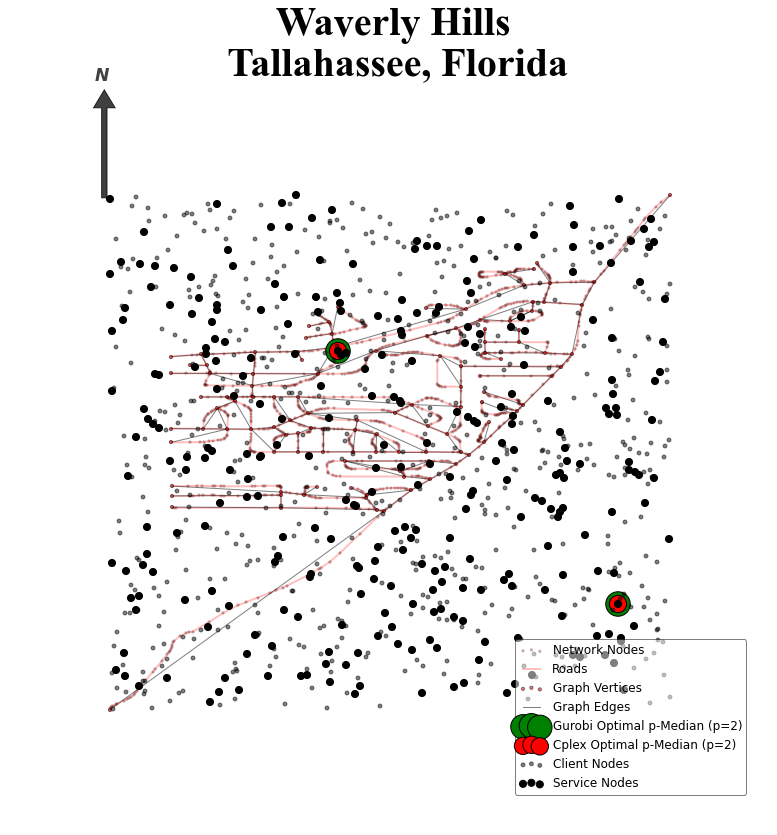

In [19]:
figsize(10,10)
# Draw Network Actual Roads and Nodes
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw Graph
nx.draw(g1, ntw.node_coords, node_size=10, alpha=0.5)

# Gurobi p-Median
P_Med_GUROBI = ps.open('shapefiles/Selected_Locations_Pmedian_GUROBI.shp')
points_median_GUROBI = {}
for idx, coords in enumerate(P_Med_GUROBI):
    GUROBI_median_g.add_node(idx)
    points_median_GUROBI[idx] = coords
    GUROBI_median_g.node[idx] = coords
nx.draw(GUROBI_median_g, points_median_GUROBI, 
        node_size=600, alpha=1, node_color='g')

# Cplex p-Median
P_Med_CPLEX = ps.open('shapefiles/Selected_Locations_Pmedian_CPLEX.shp')
points_median_CPLEX = {}
for idx, coords in enumerate(P_Med_CPLEX):
    CPLEX_median_g.add_node(idx)
    points_median_CPLEX[idx] = coords
    CPLEX_median_g.node[idx] = coords
nx.draw(CPLEX_median_g, points_median_CPLEX, 
        node_size=300, alpha=1, node_color='r')

# Draw Graph of Random Service
nx.draw(GRAPH_client, points_client, 
        node_size=15, alpha=.5, node_color='k')

# Draw Graph of Random Service
nx.draw(GRAPH_service, points_service, 
        node_size=50, alpha=1, node_color='k')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Graph Vertices']=g1
LEGEND['Graph Edges']=g1
LEGEND['Gurobi Optimal p-Median (p=2)']=GUROBI_median_g
LEGEND['Cplex Optimal p-Median (p=2)']=CPLEX_median_g
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

<font size='5' face='Times New Roman'><b>3.2 <u>Optimized Values</u></b></font>

In [20]:
print '********************************************************'
print ' | Total Cost: Objective Function Value (miles)       '
print ' |  | Gurobi ------------------ ', val, '       '
print ' |  | CPLEX ------------------- ', solution.get_objective_value(), '       '
print '-------------------------------------------------------'
print ' | Total Time to Build Model and Optimize: (seconds)  '
print ' |  | Gurobi ------------------ ', t2P, '       '
print ' |  | CPLEX ------------------- ', t2C, '       '
print '********************************************************'

********************************************************
 | Total Cost: Objective Function Value (miles)       
 |  | Gurobi ------------------  12145.3961216        
 |  | CPLEX -------------------  12145.3961216        
-------------------------------------------------------
 | Total Time to Build Model and Optimize: (seconds)  
 |  | Gurobi ------------------  39.9408531189        
 |  | CPLEX -------------------  812.942018986        
********************************************************


<font size='5' face='Times New Roman'><b>3.3 <u>System Information</u></b></font>

In [21]:
print '********************************************************'
print ' | Platform Specs:                                    |'
print ' |  | OS X Yosemite v10.10.4                          |'
print ' |  | MacBook Pro (Retina, 13-inch, Early 2015)       |'
print ' |  | Processor: 3.1 GHz Intel Core i7                |'
print ' |  | Memory: 16 GB 1867 MHz DDR3                     |'
print '********************************************************'
print ' |  | Date/Time --------- ', dt.datetime.now(), '|'
print '********************************************************'

********************************************************
 | Platform Specs:                                    |
 |  | OS X Yosemite v10.10.4                          |
 |  | MacBook Pro (Retina, 13-inch, Early 2015)       |
 |  | Processor: 3.1 GHz Intel Core i7                |
 |  | Memory: 16 GB 1867 MHz DDR3                     |
********************************************************
 |  | Date/Time ---------  2015-08-17 16:01:39.005535 |
********************************************************


-----------------------